In [1]:
import sys
sys.path.append("C:/Users/Pierre Houdouin/Desktop/Gaussian process/Code")
from samplers import SyntheticSampler
from preprocessings import preprocessing
from gaussian_process_model import GaussianProcessModel
from gaussian_process_plot import plot_samples, plot_prediction, plot_custom
from gaussian_process_evaluation import GaussianProcessEvaluation

Using backend: torch


# Parameters

In [2]:
### Data generation
library             = "GPyTorch"
input_dimension     = 1
x_length            = 10
function_name       = "multimodal sinus"
function_parameters = {"power sinus"      : {"Power"        : 2},
                       "heaviside"        : {"x gaps"       : [0, 0.5, 1], 
                                             "y values"     : [0, -0.5], 
                                             "sigma noises" : [0.01, 0.01]},
                       "multimodal sinus" : {"x gaps"       : [0, 3, 6, 10], 
                                             "speed values" : [0.5, 0.5, 0.5]},
                       }

N_function          = 1000
N_observed          = 25

### Gaussian process model
kernel_name                     = "RBF"
kernel_parameters_optimization  = {"sigma0"                   : 1                              ,
                                   "Length scale"             : 1                              ,
                                   "Length scales"            : [1, 1, 1, 1]                   ,
                                   "Noise"                    : 1e-2                           ,
                                   "Lower bound sigma0"       : 0.1                            ,
                                   "Upper bound sigma0"       : 5                              ,
                                   "Lower bound length scale" : 0.1                            ,
                                   "Upper bound length scale" : 5                              ,
                                   "Lower bound noise"        : 1e-4                           ,
                                   "Upper bound noise"        : 1e1                            ,
                                   "SKlearn"       : {"N restarts optimizer" : 20},
                                   "GPMP"          : {}                           ,
                                   "GPyTorch"      : {"Training iterations" : 50}
                                  }
optimize_kernel_hyperparameters = True

# Data generation

In [3]:
synthetic_sampler = SyntheticSampler(input_dimension, x_length, function_name, function_parameters)
function_samples  = synthetic_sampler.sample(N_function)
observed_samples  = synthetic_sampler.extract_from_samples(N_observed, function_samples)

# Preprocessing

In [4]:
X_function, X_observed, Y_function, Y_observed = preprocessing(library, function_samples, observed_samples)

In [5]:
plot_samples(X_function, X_observed, Y_function, Y_observed)

# Training

In [6]:
gaussian_process_model        = GaussianProcessModel(library, X_observed, Y_observed, kernel_name, kernel_parameters_optimization, optimize_kernel_hyperparameters)
gaussian_process_model.train_gaussian_process_model()
posterior_mean, posterior_std = gaussian_process_model.predict(X_function)
gaussian_process_parameters   = gaussian_process_model.gaussian_process_parameters

In [7]:
gaussian_process_parameters

{'sigma0': 1.0342924164028566,
 'Noise': 0.001947046566847888,
 'Length scale 0': 0.5525449286275771}

# Gaussian process model visualization

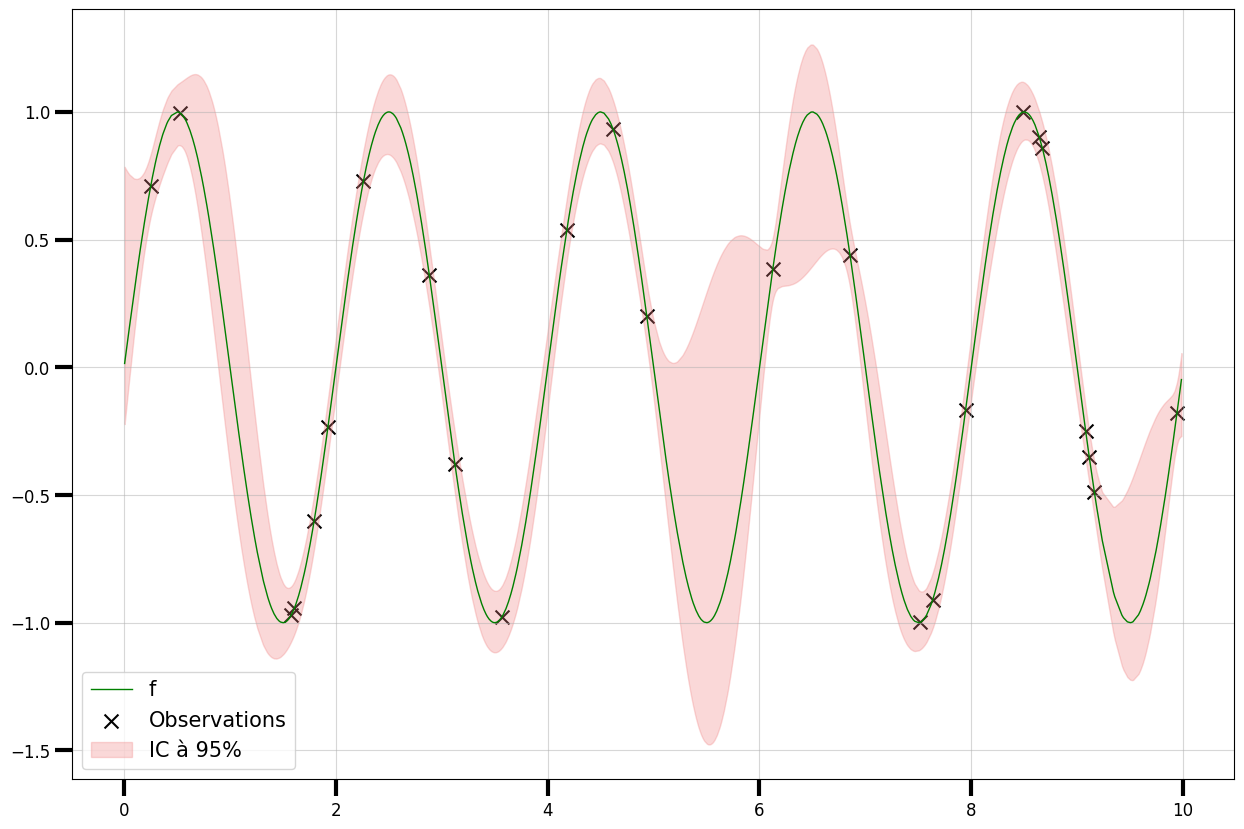

In [8]:
plot_prediction(X_function, X_observed, Y_function, Y_observed, posterior_mean, posterior_std)

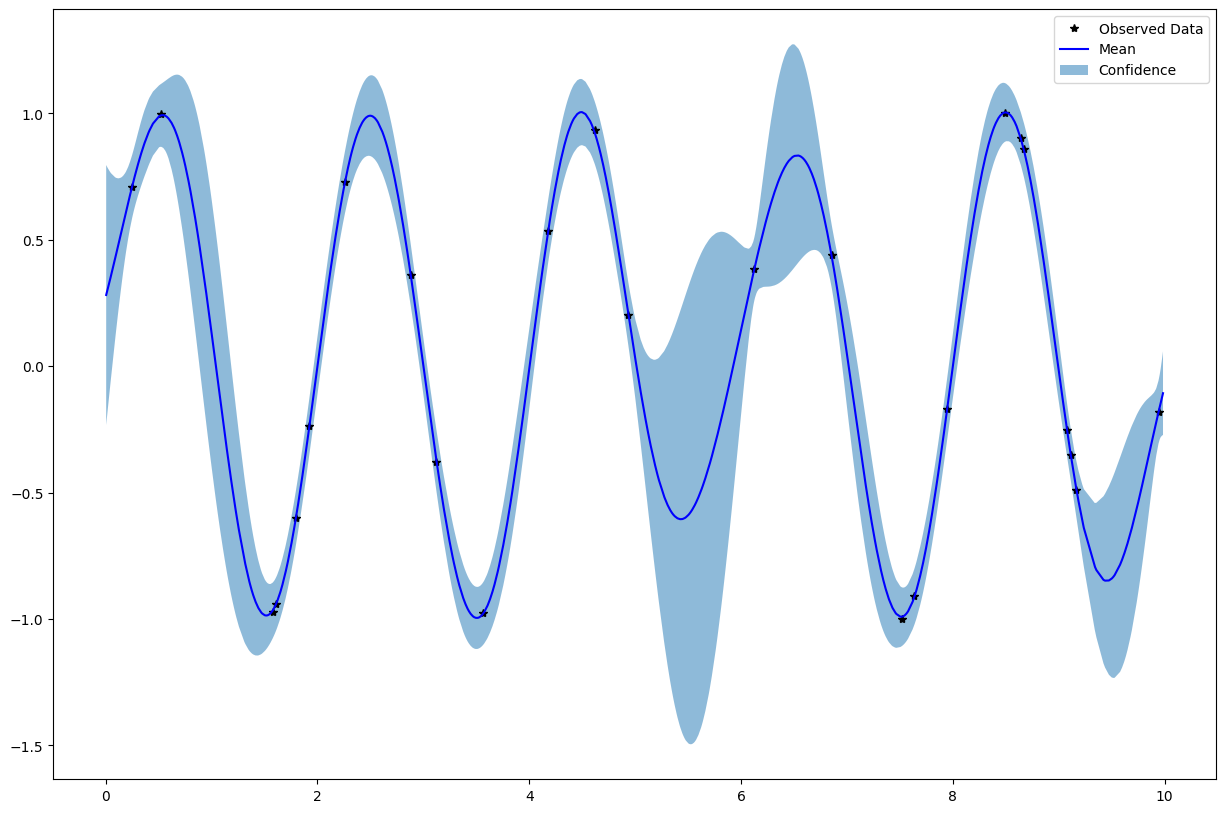

In [9]:
plot_custom(library, X_function, X_observed, Y_function, Y_observed, posterior_mean, posterior_std, gaussian_process_model)

# Evaluation

C:\Users/Pierre Houdouin/Desktop/Gaussian process/Code\gaussian_process_plot.py:65: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.



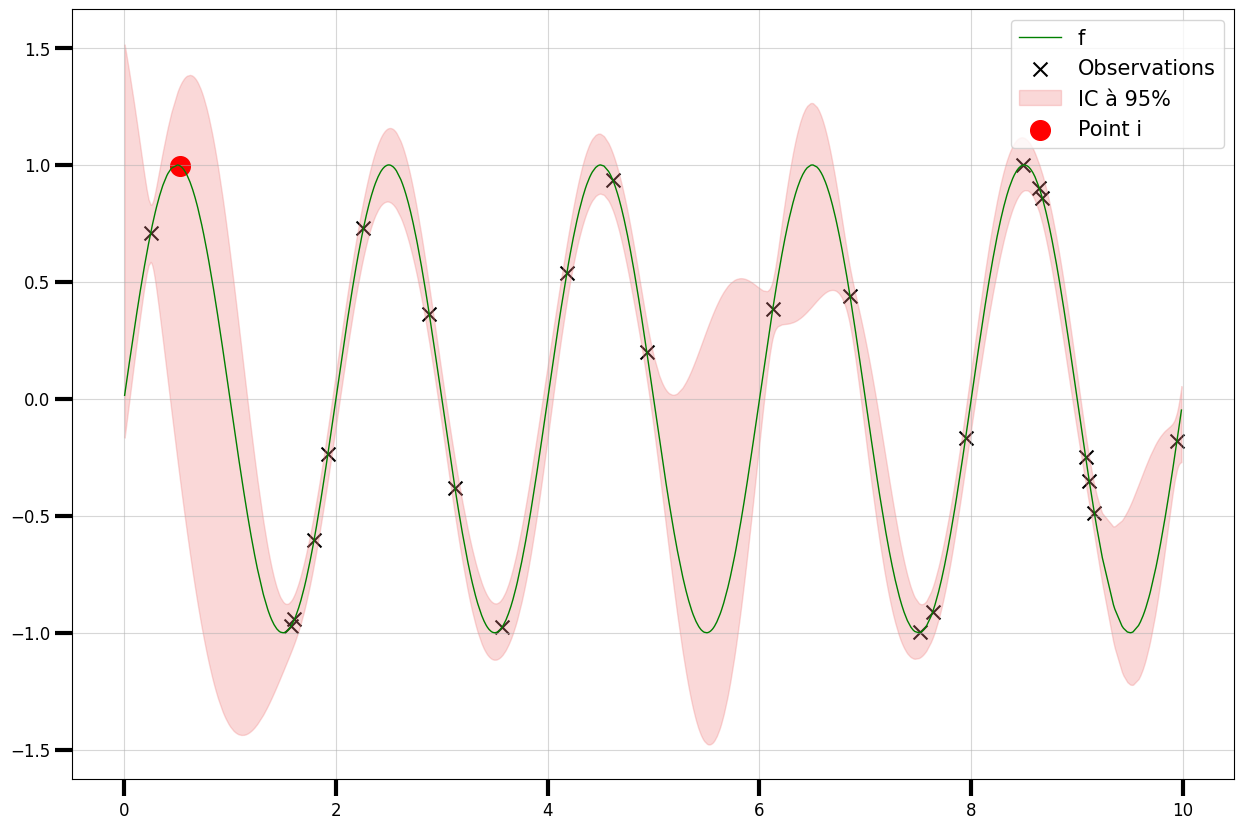

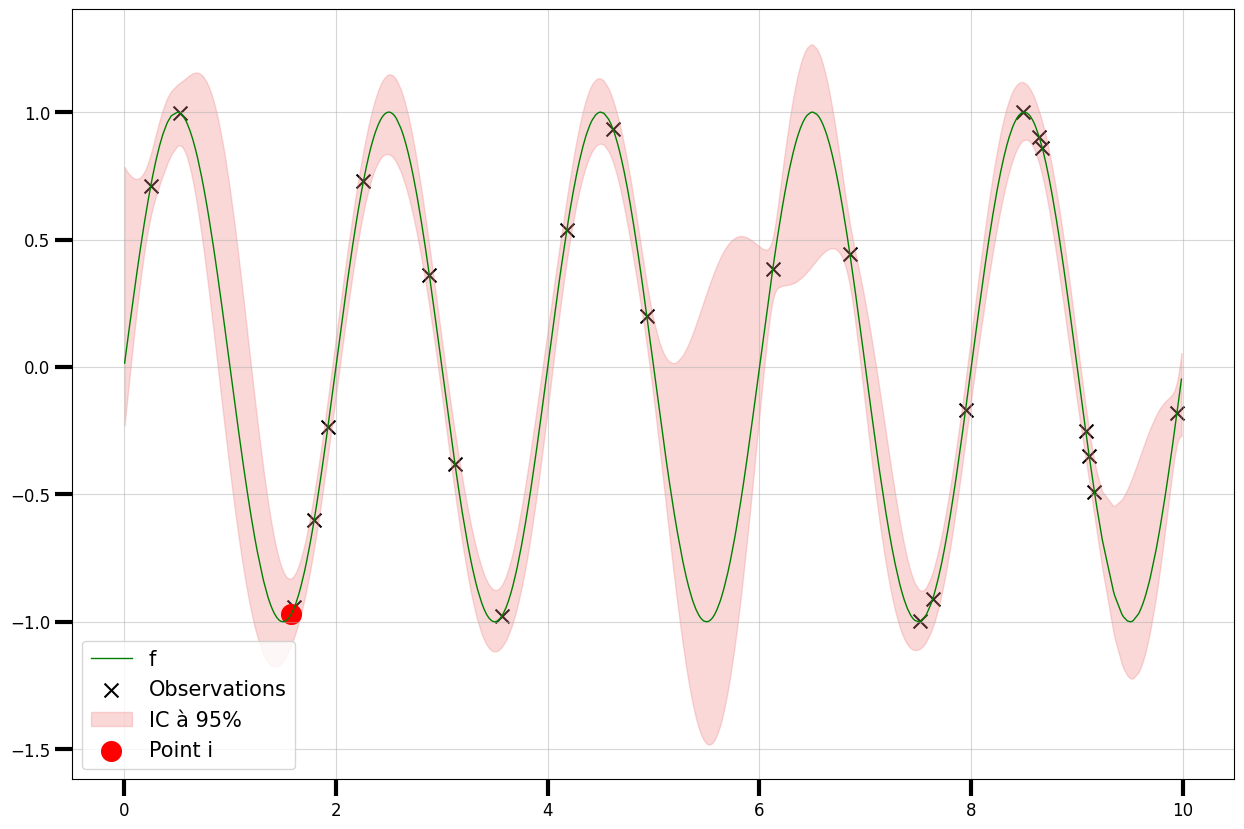

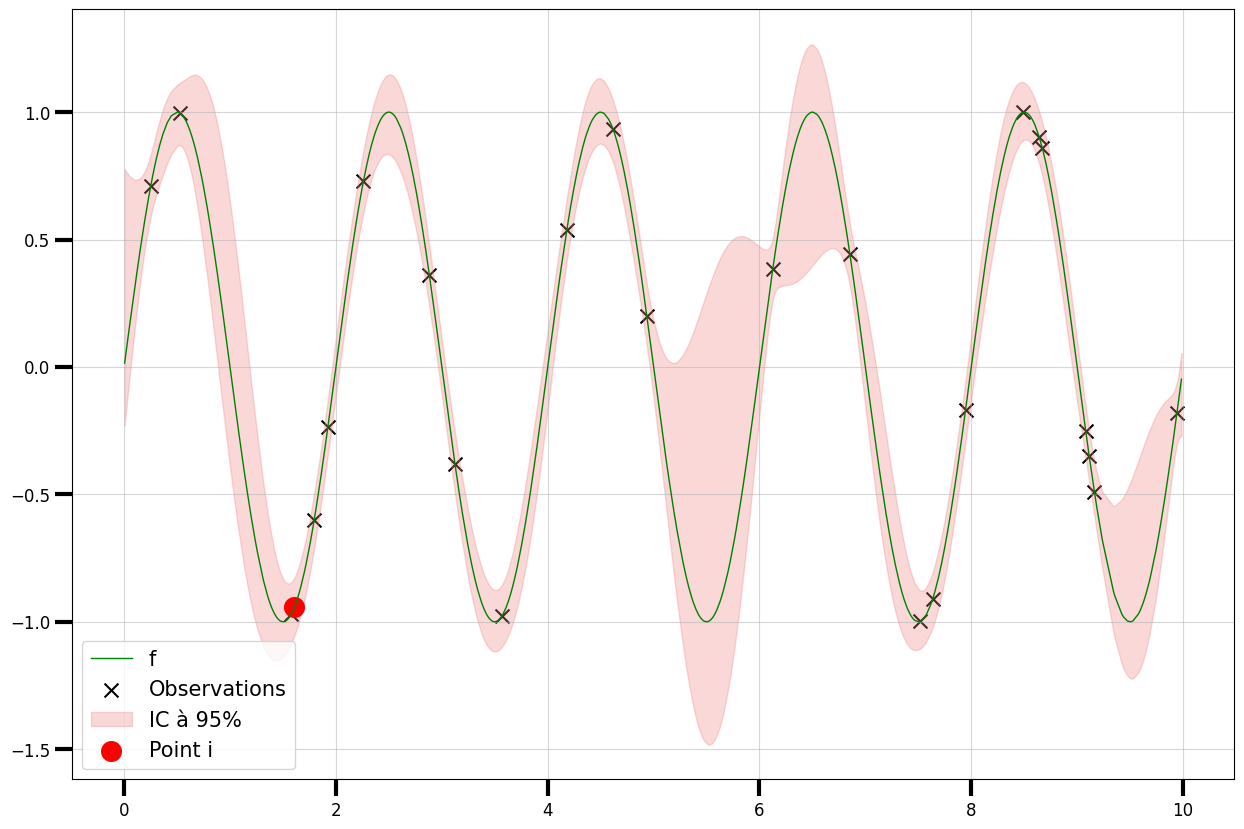

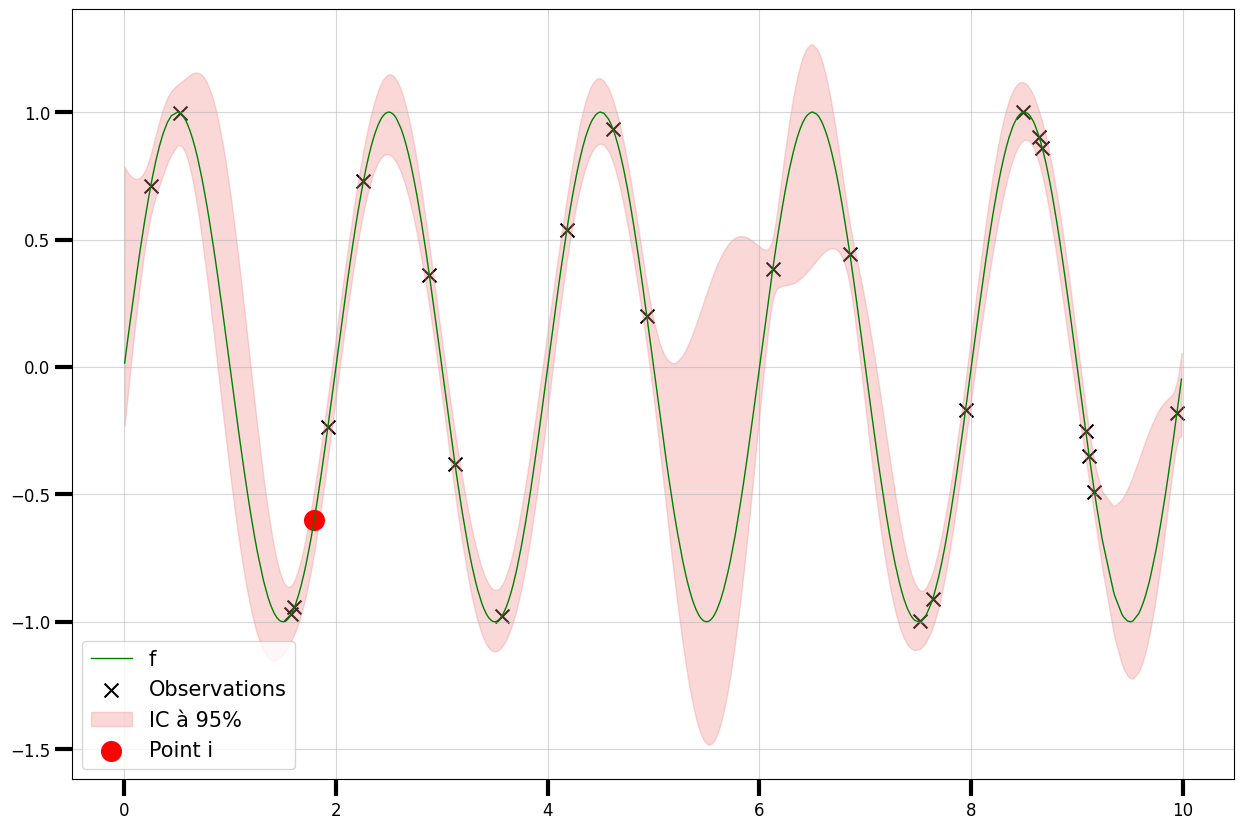

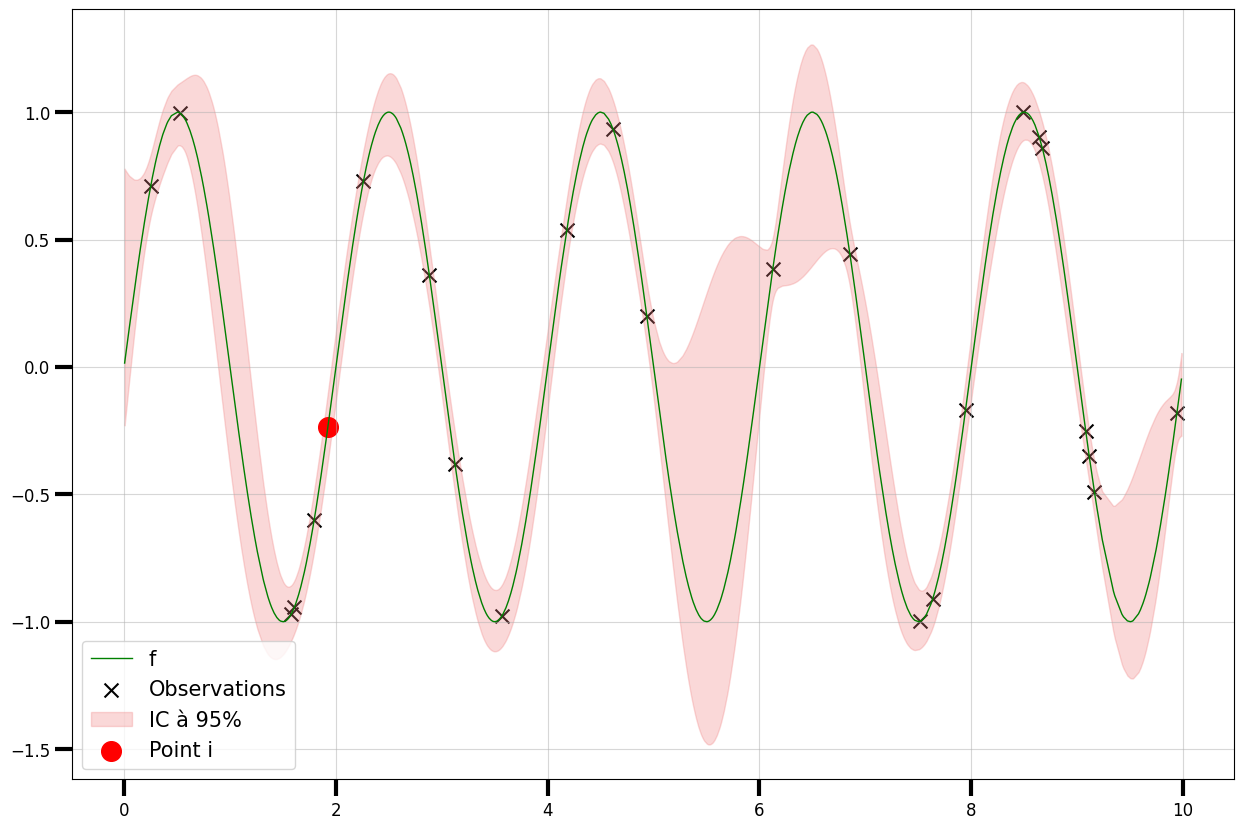

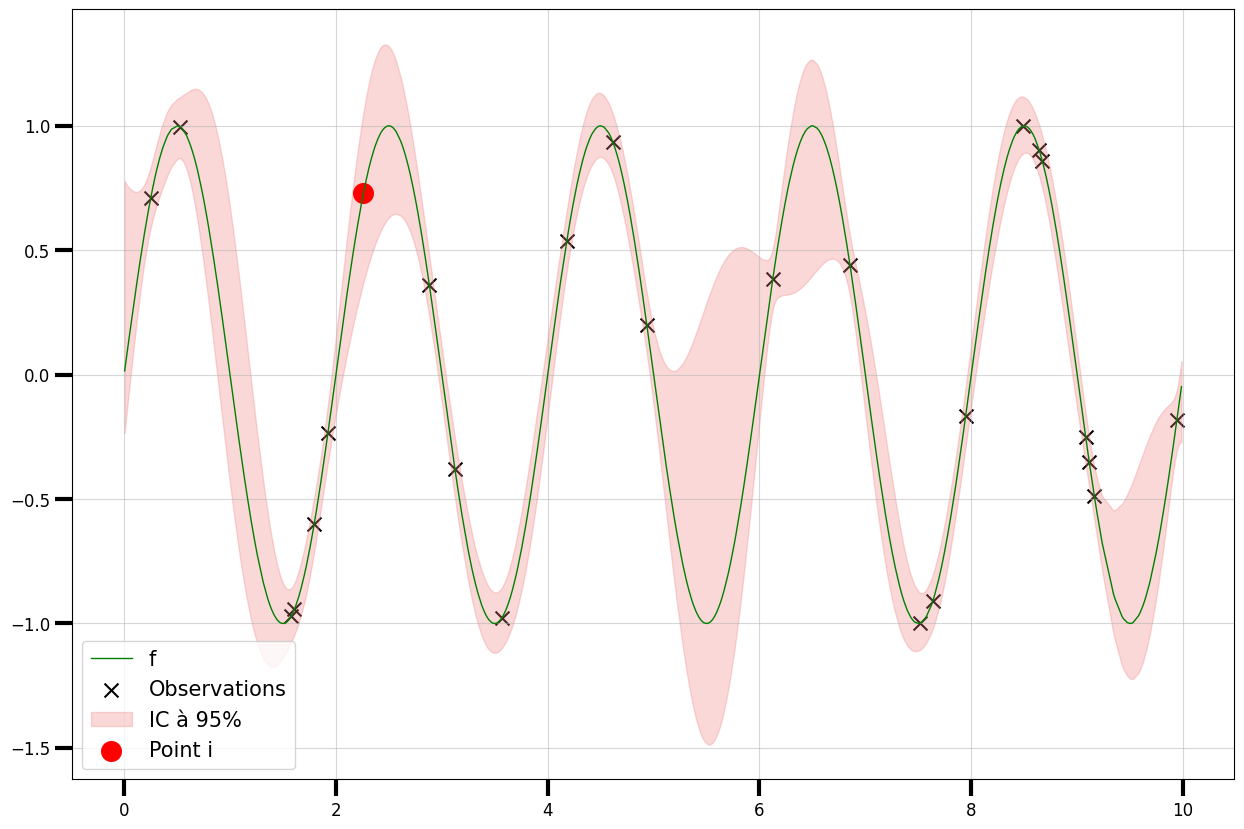

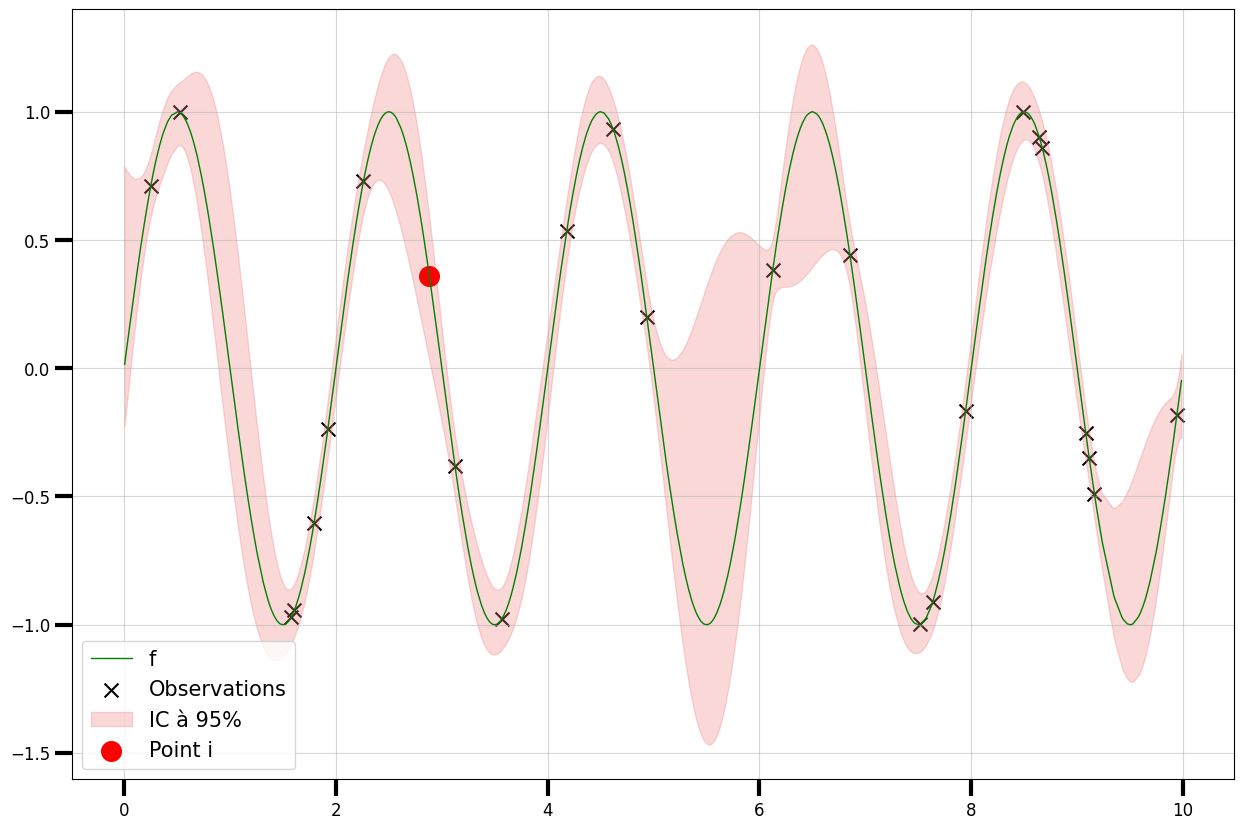

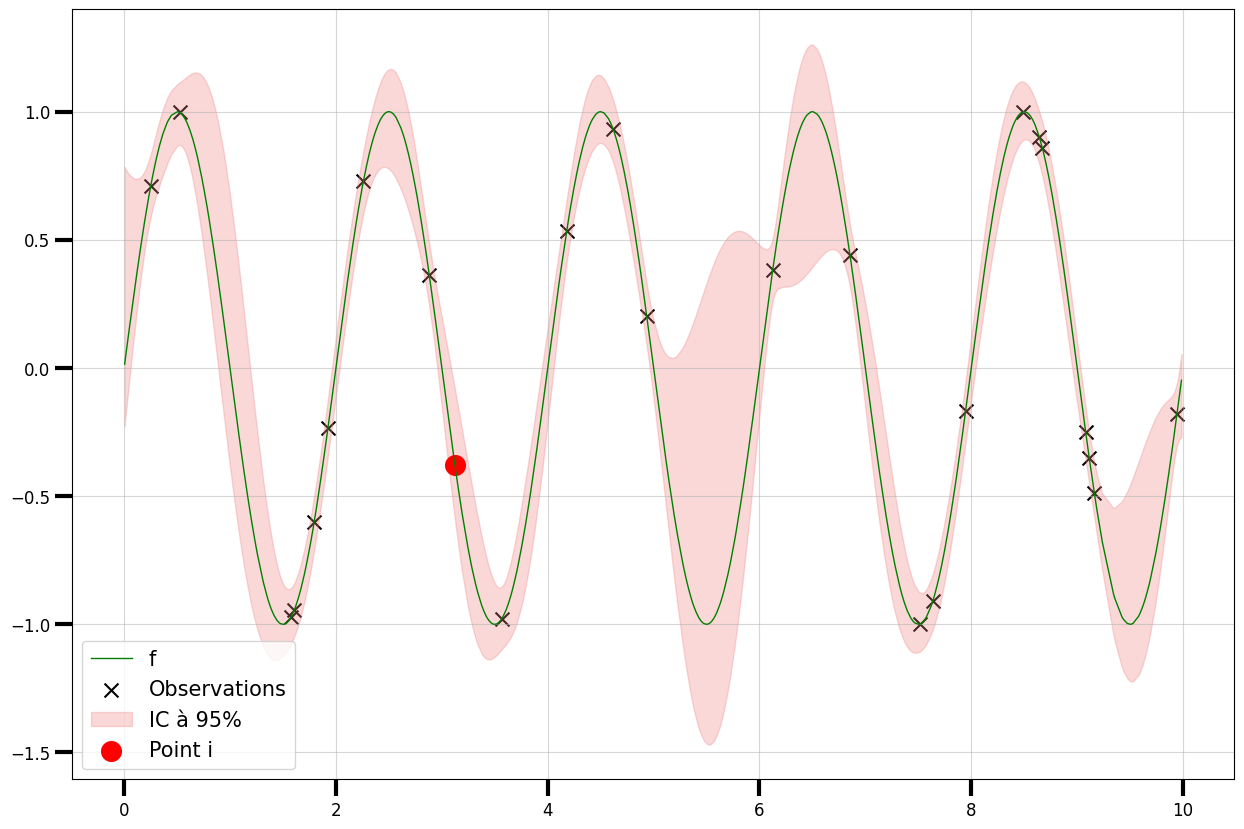

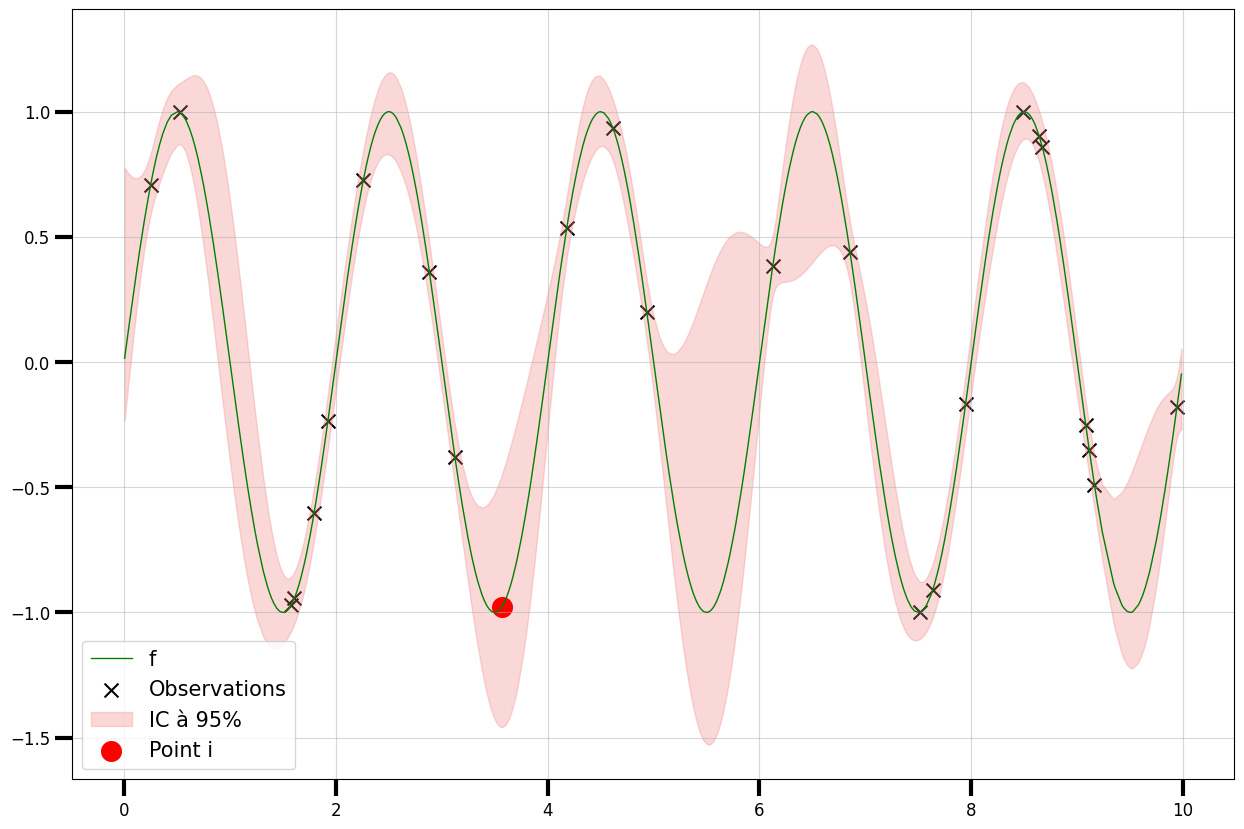

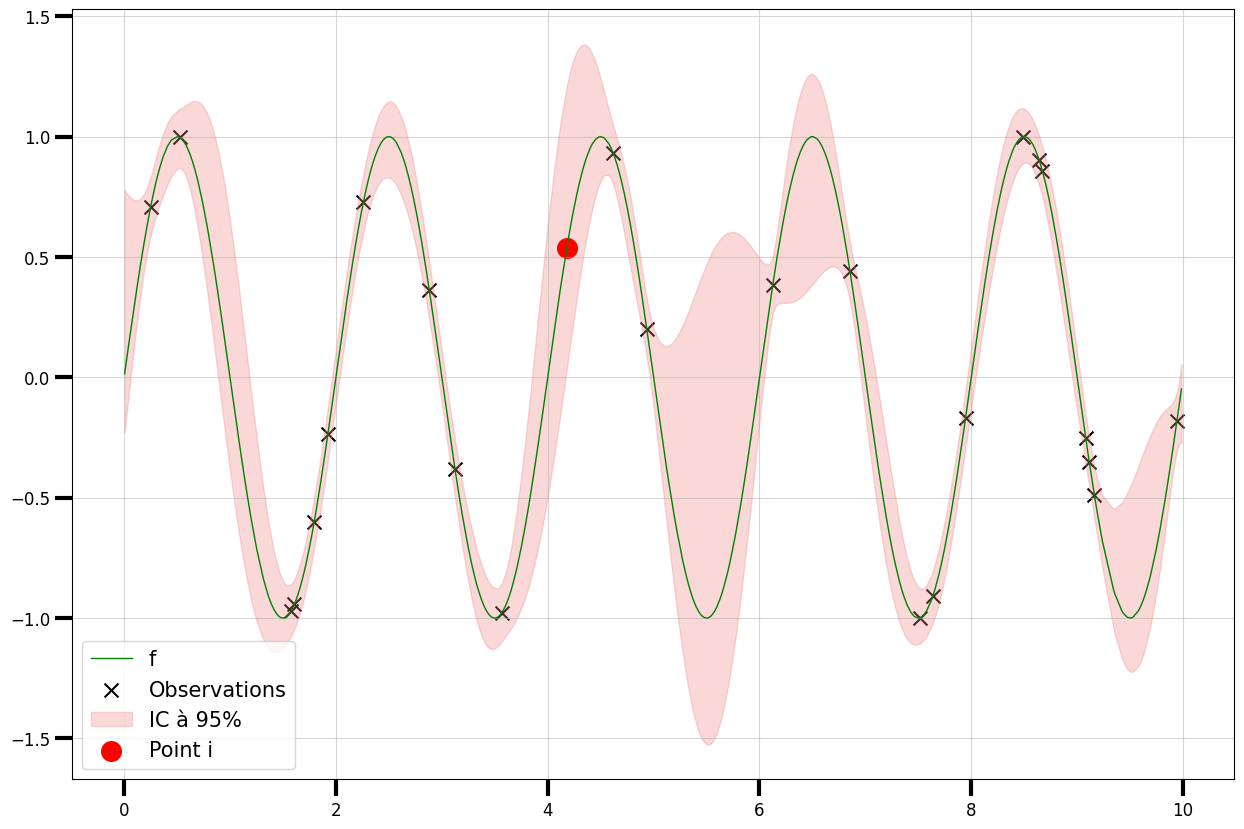

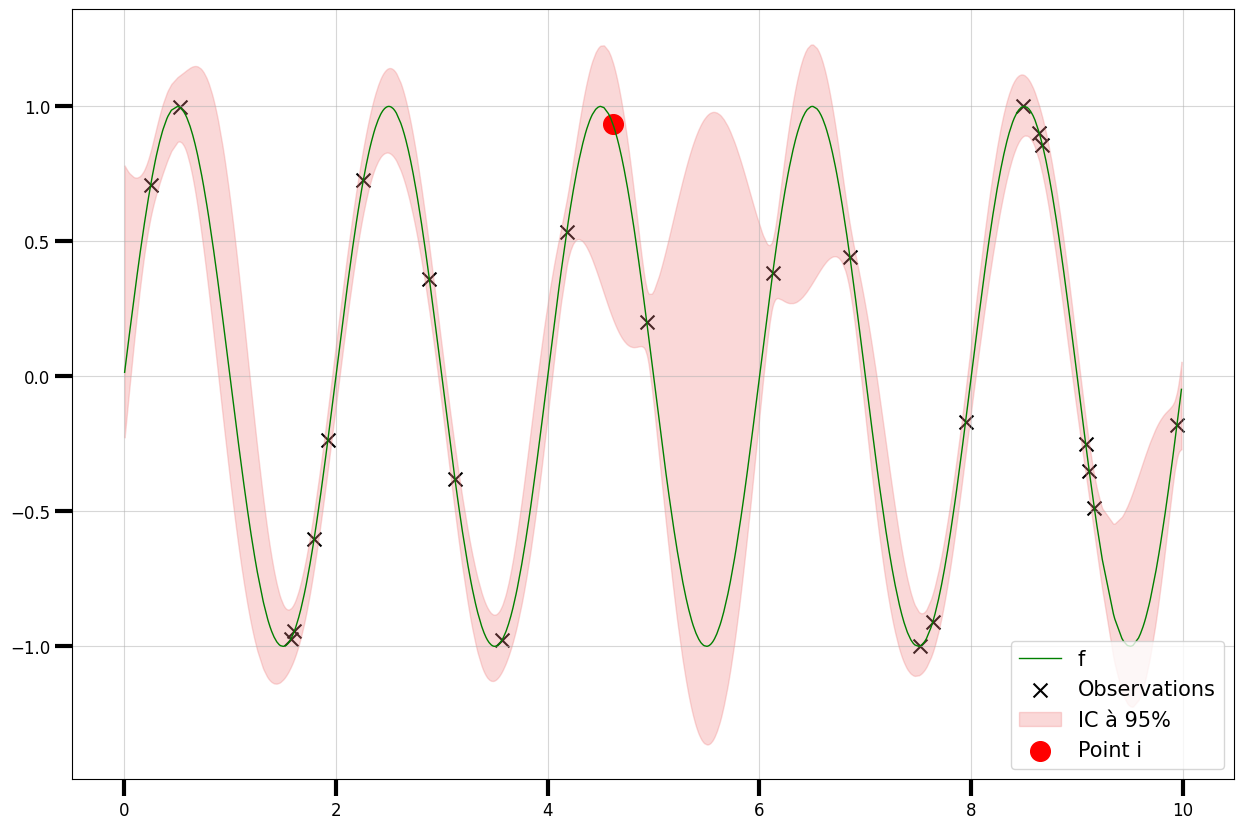

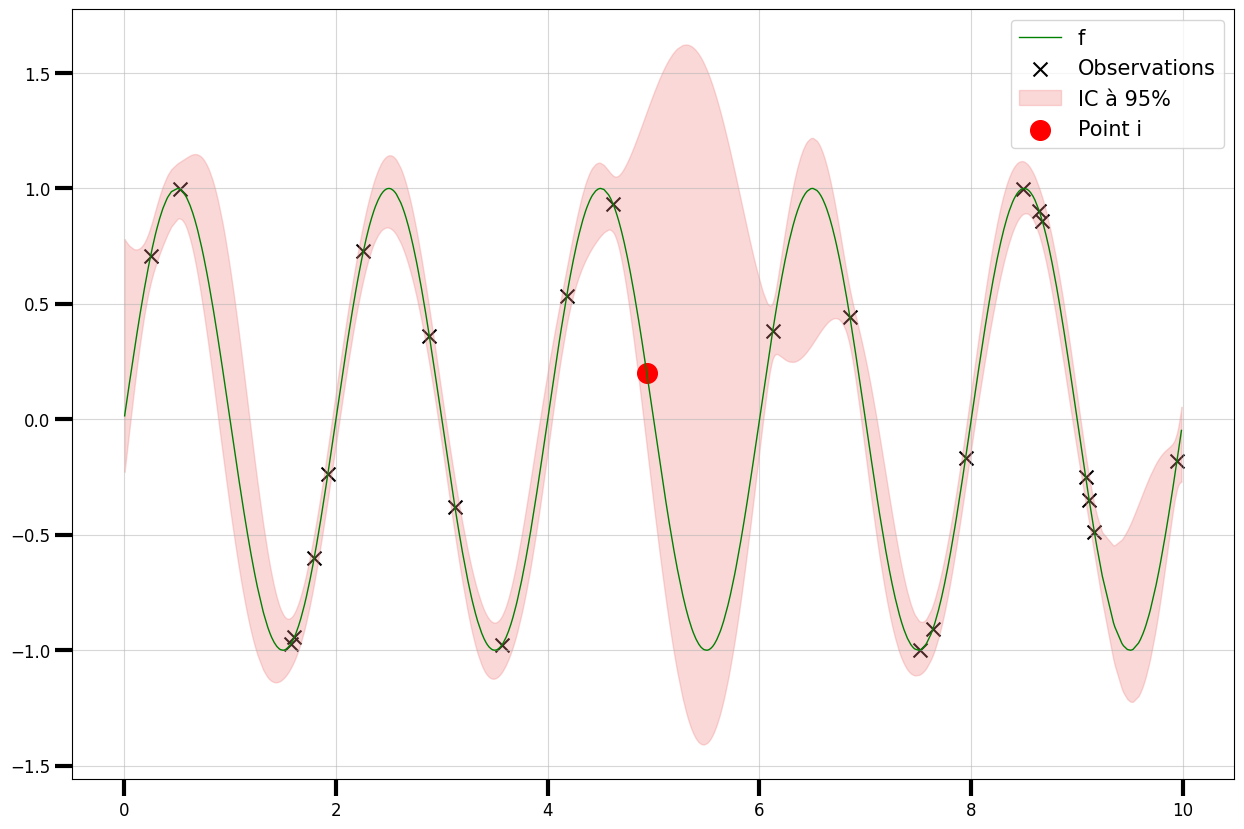

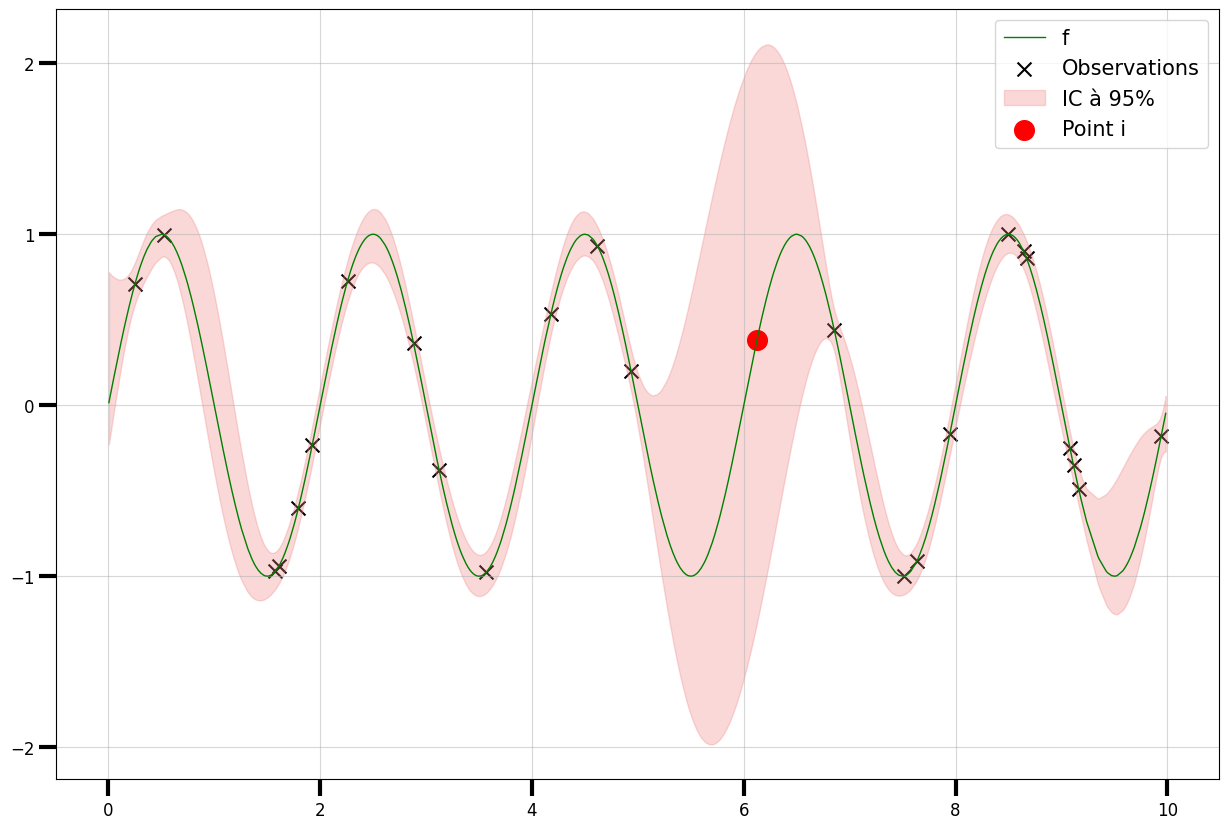

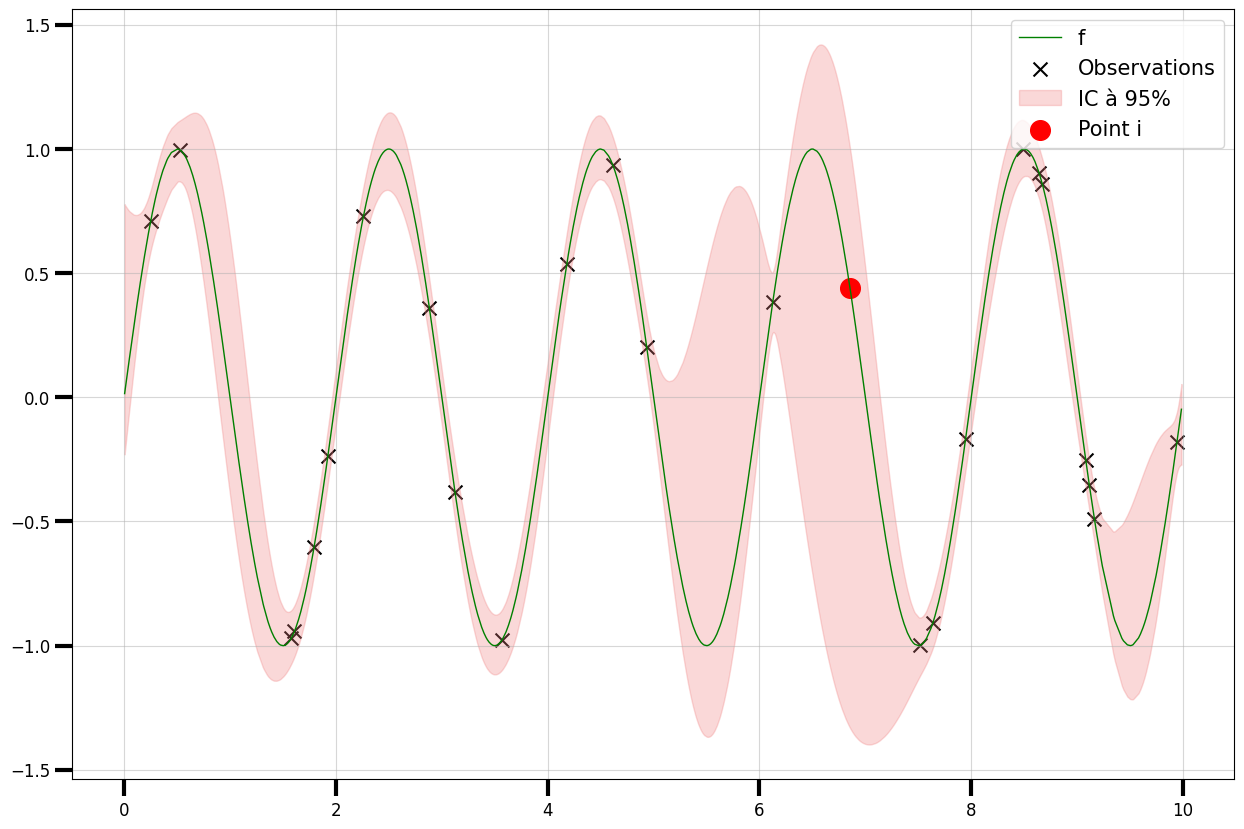

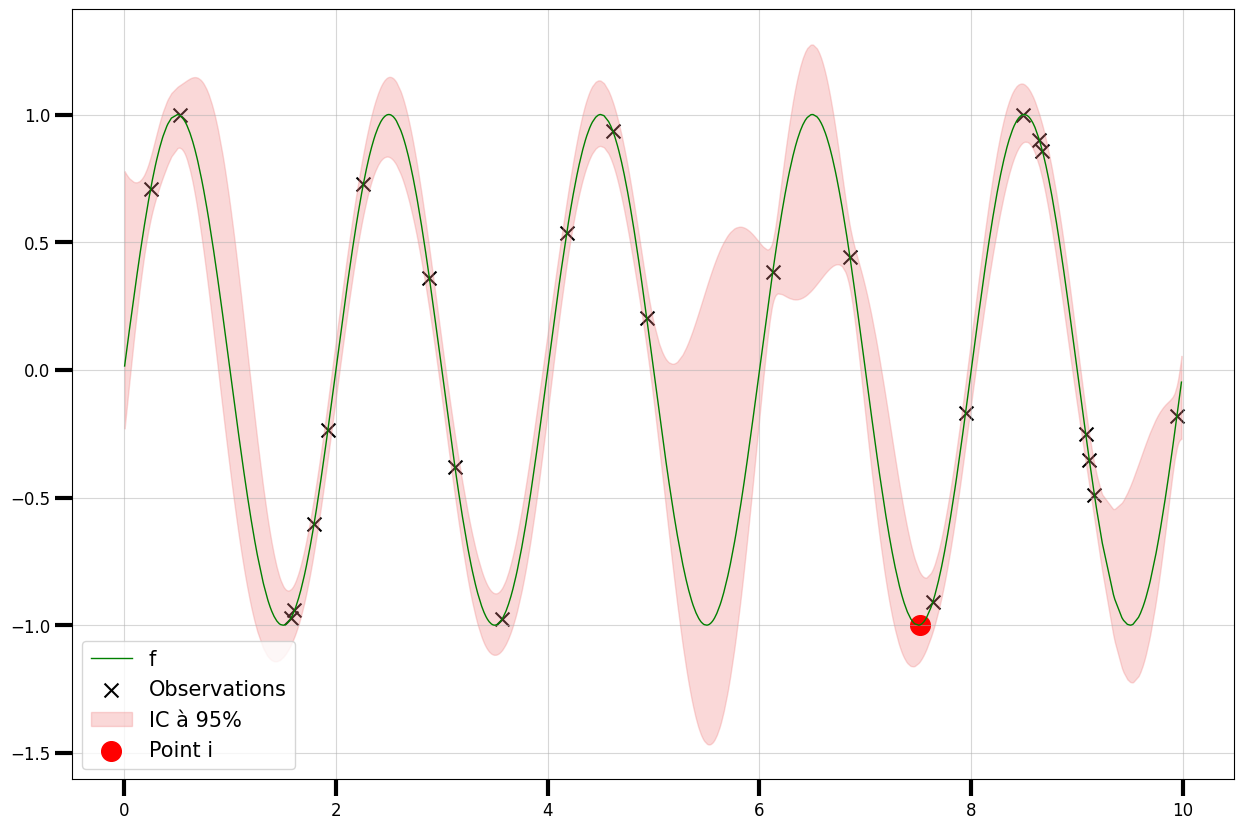

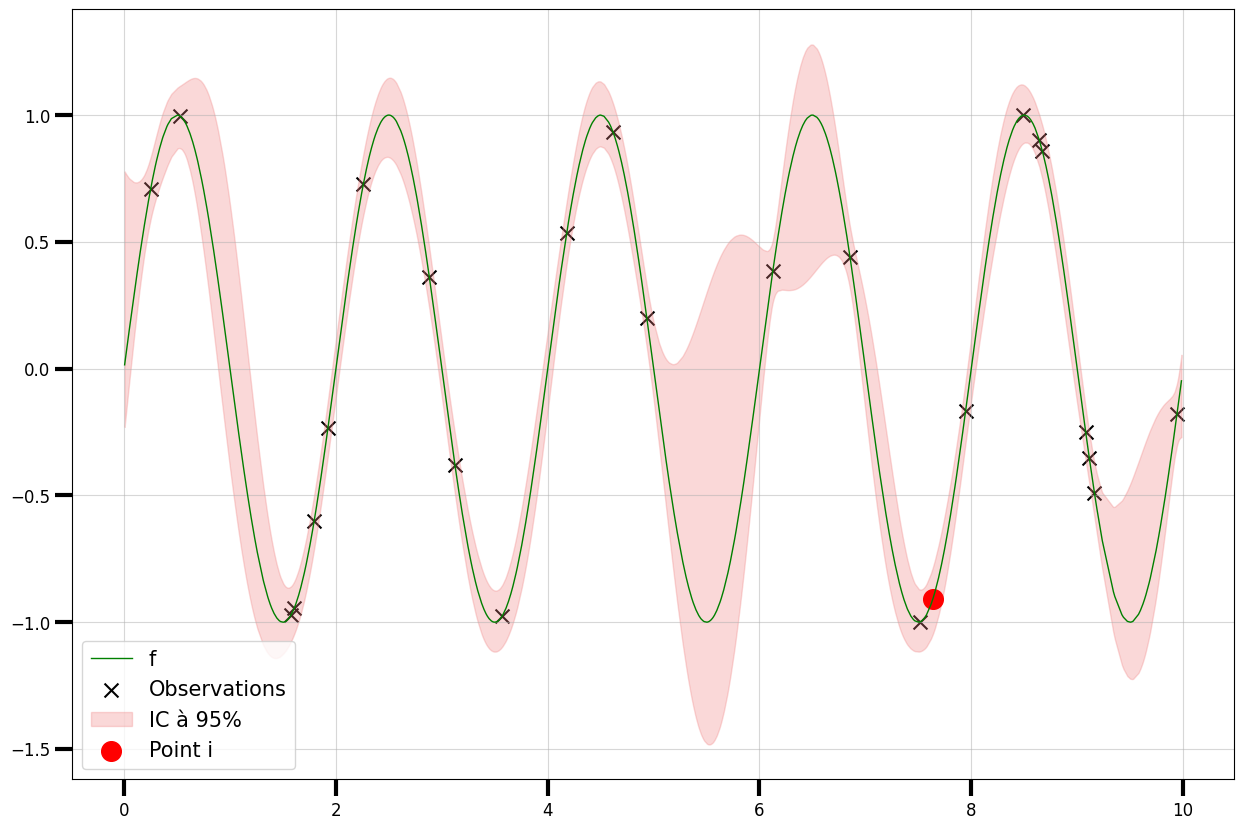

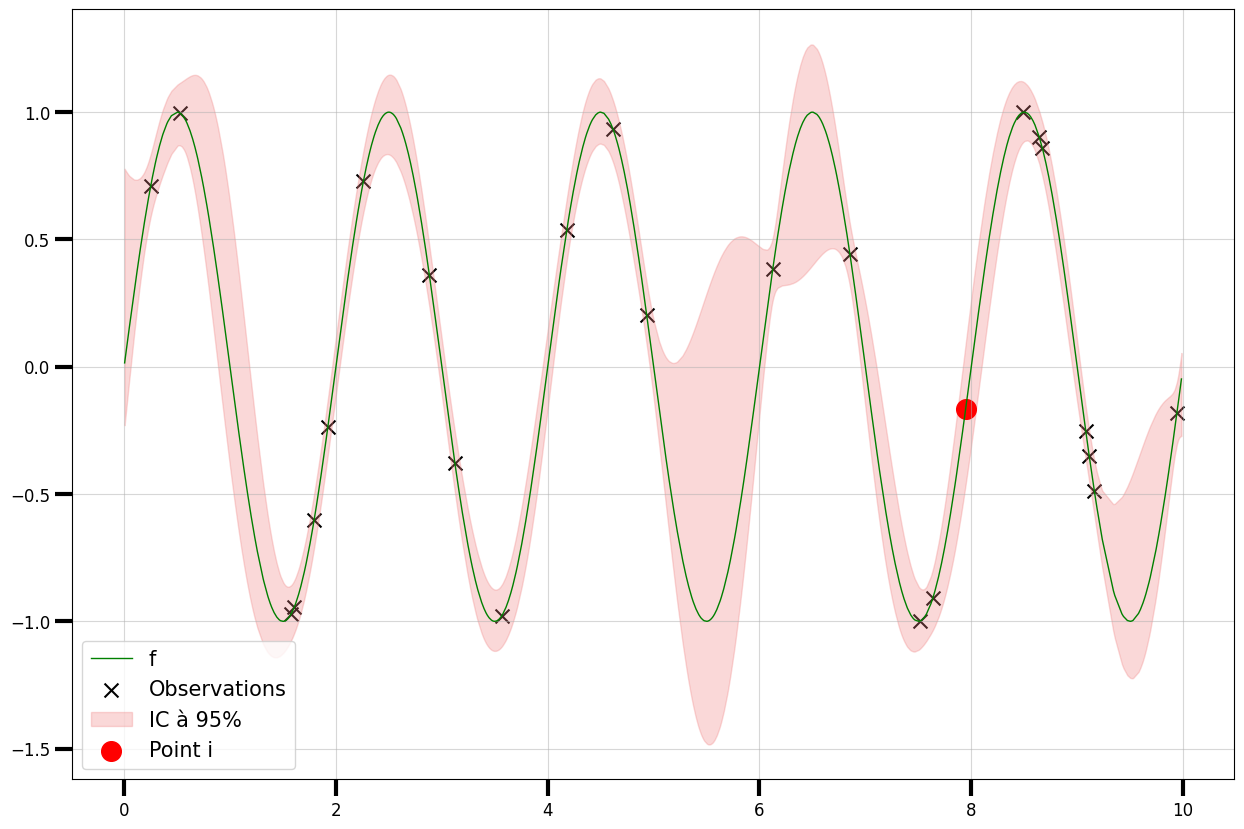

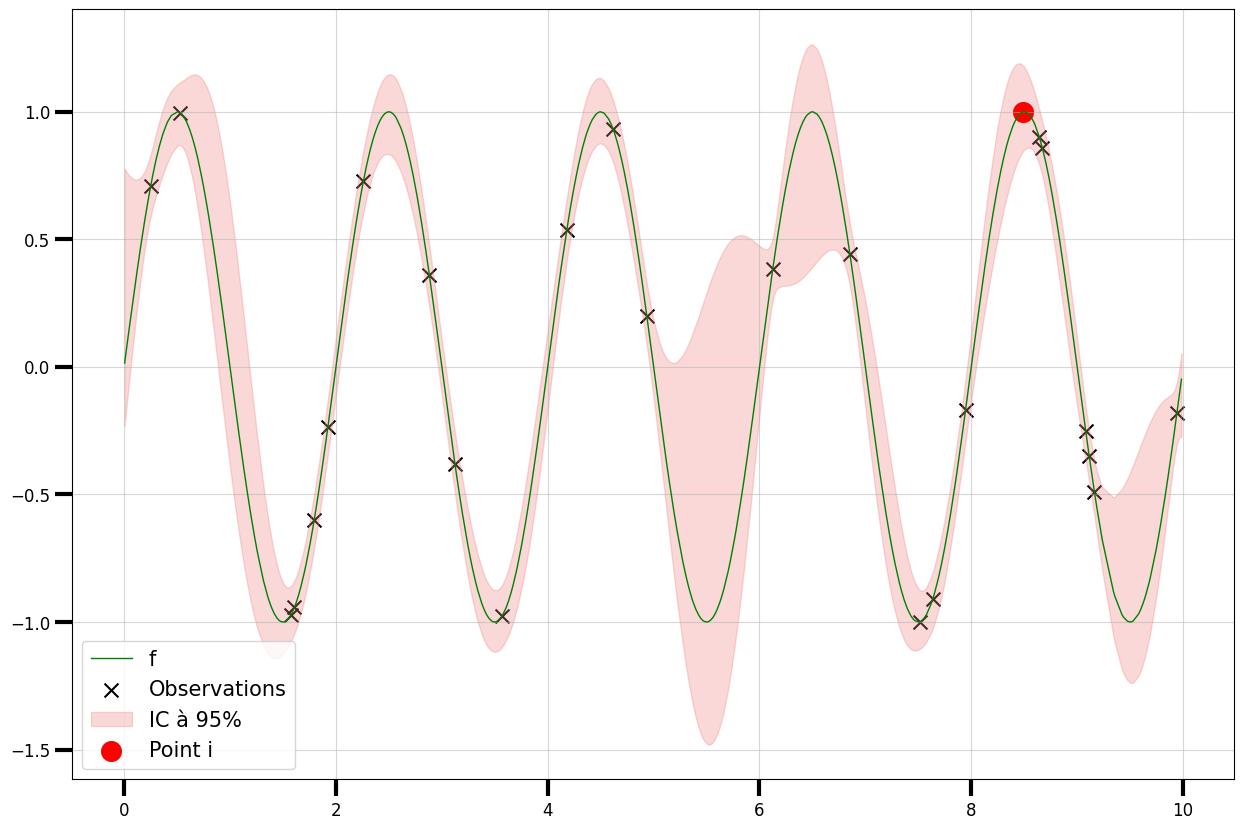

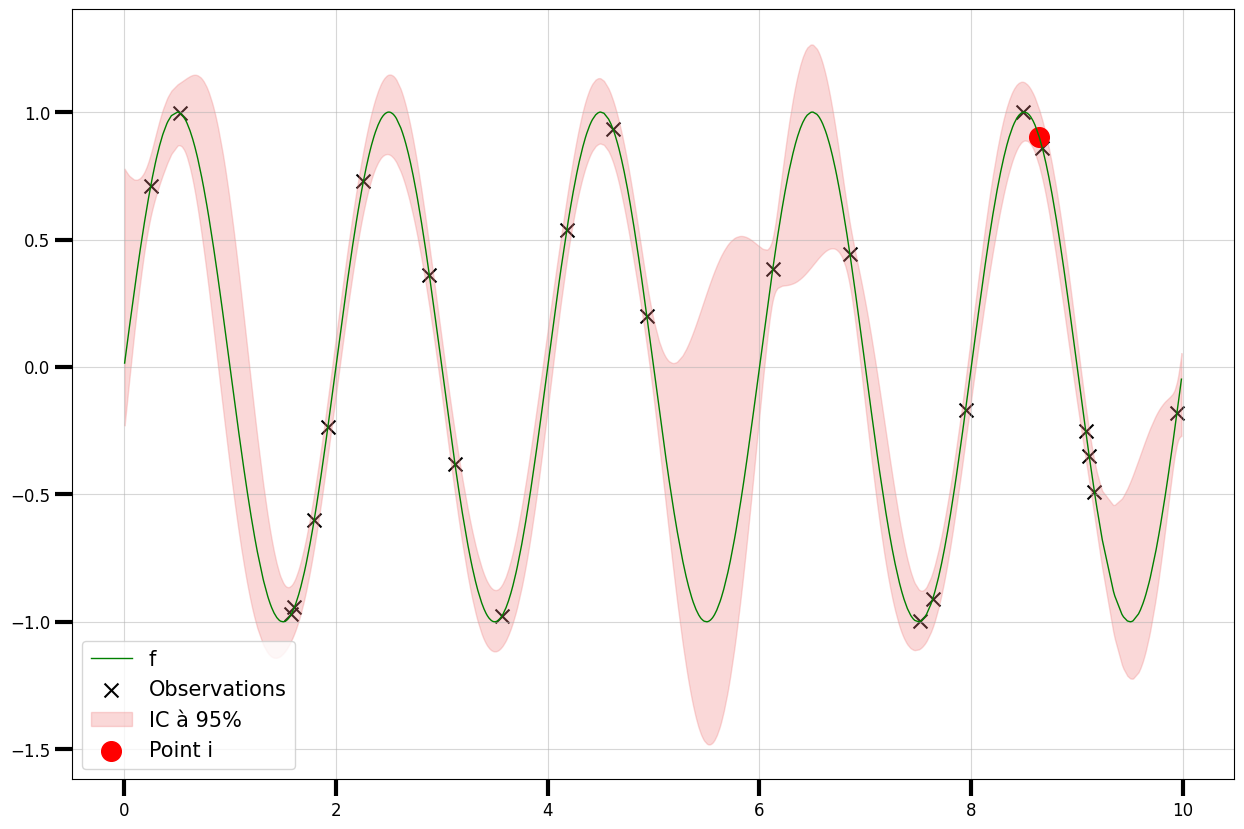

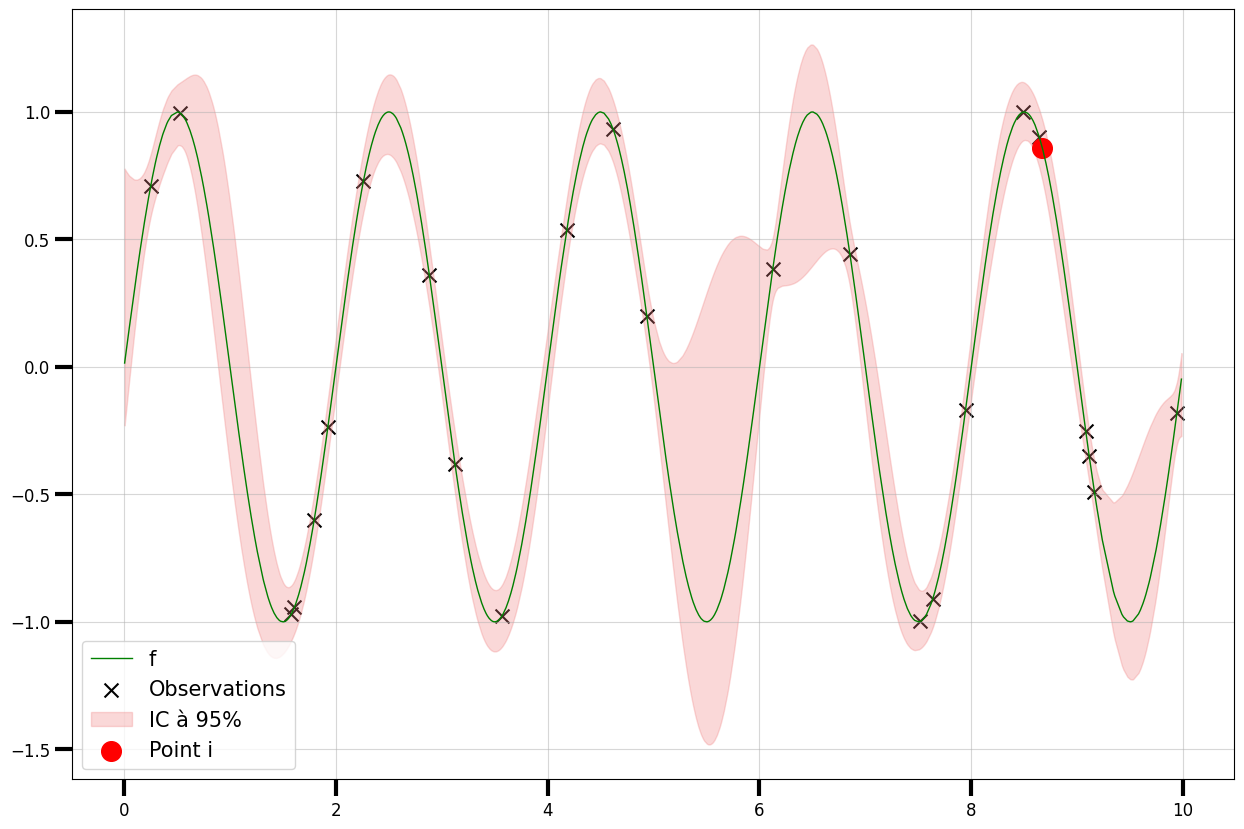

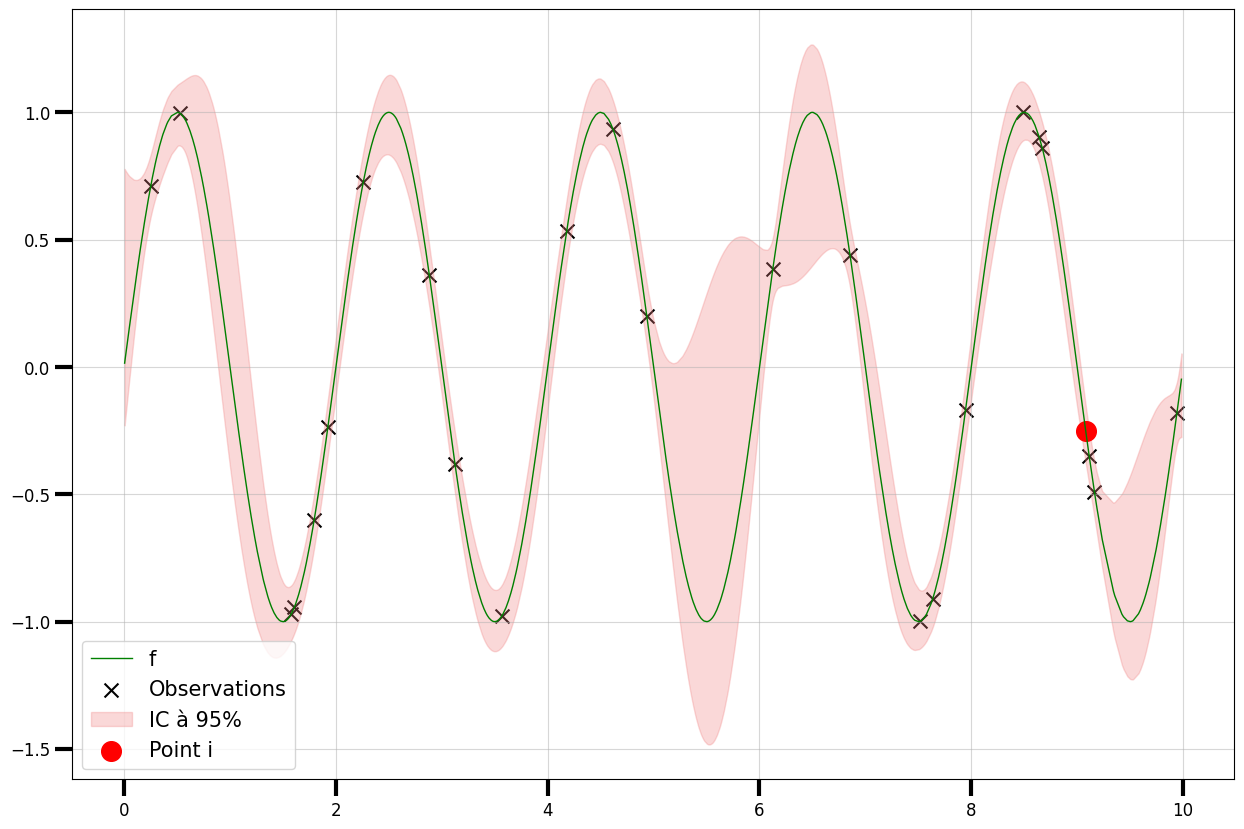

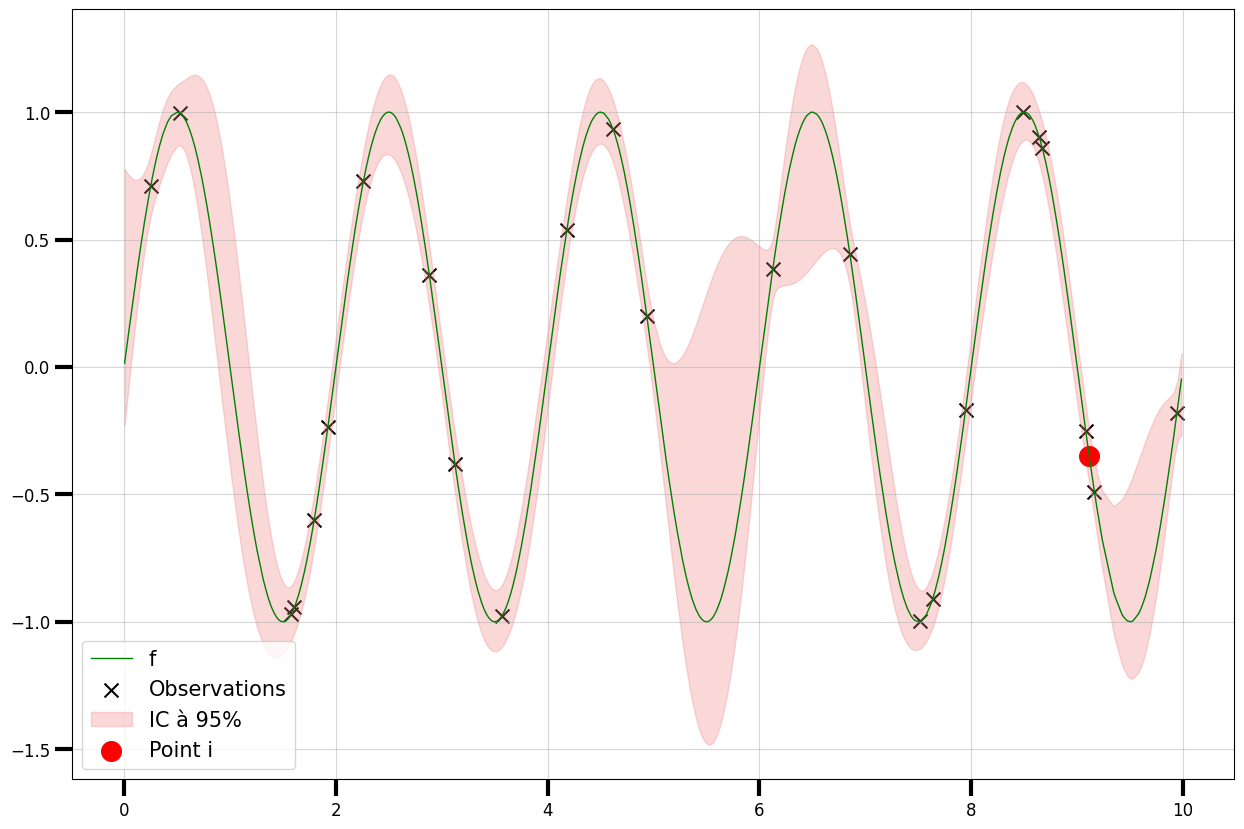

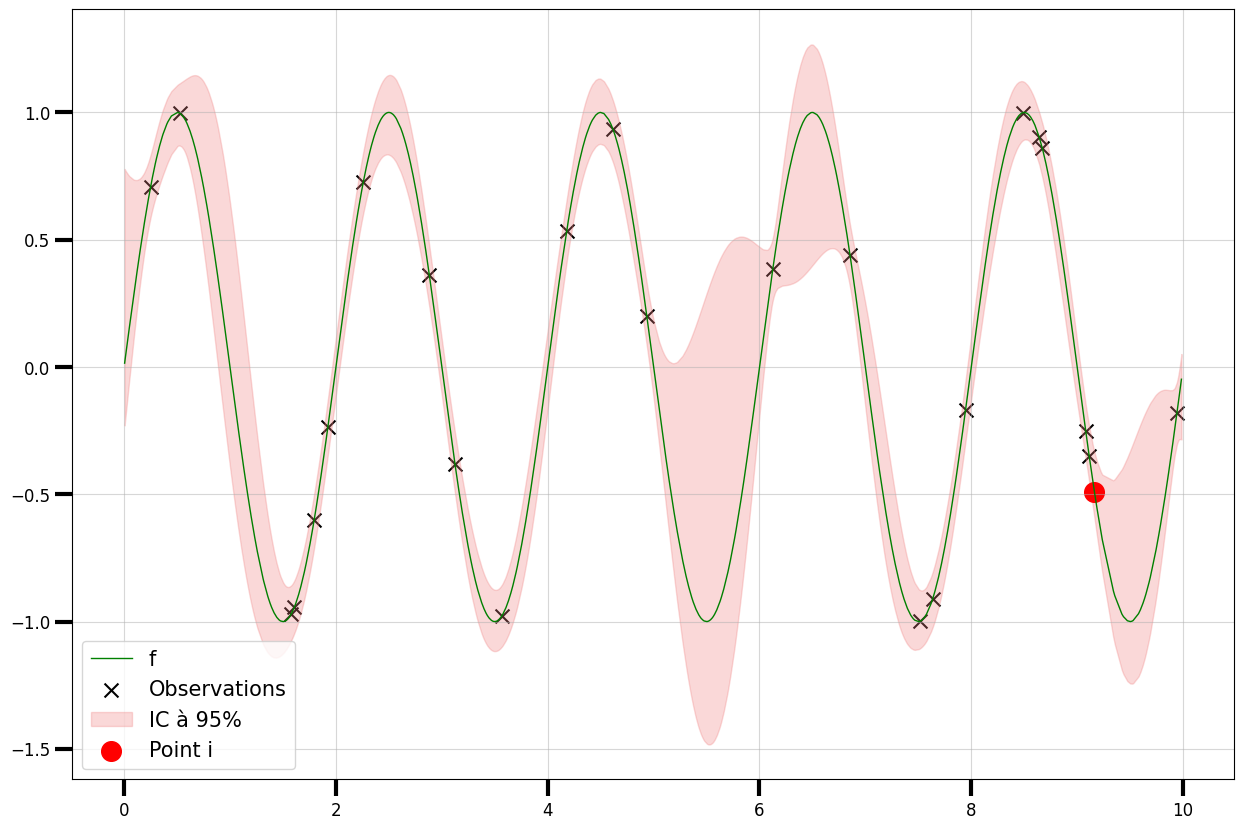

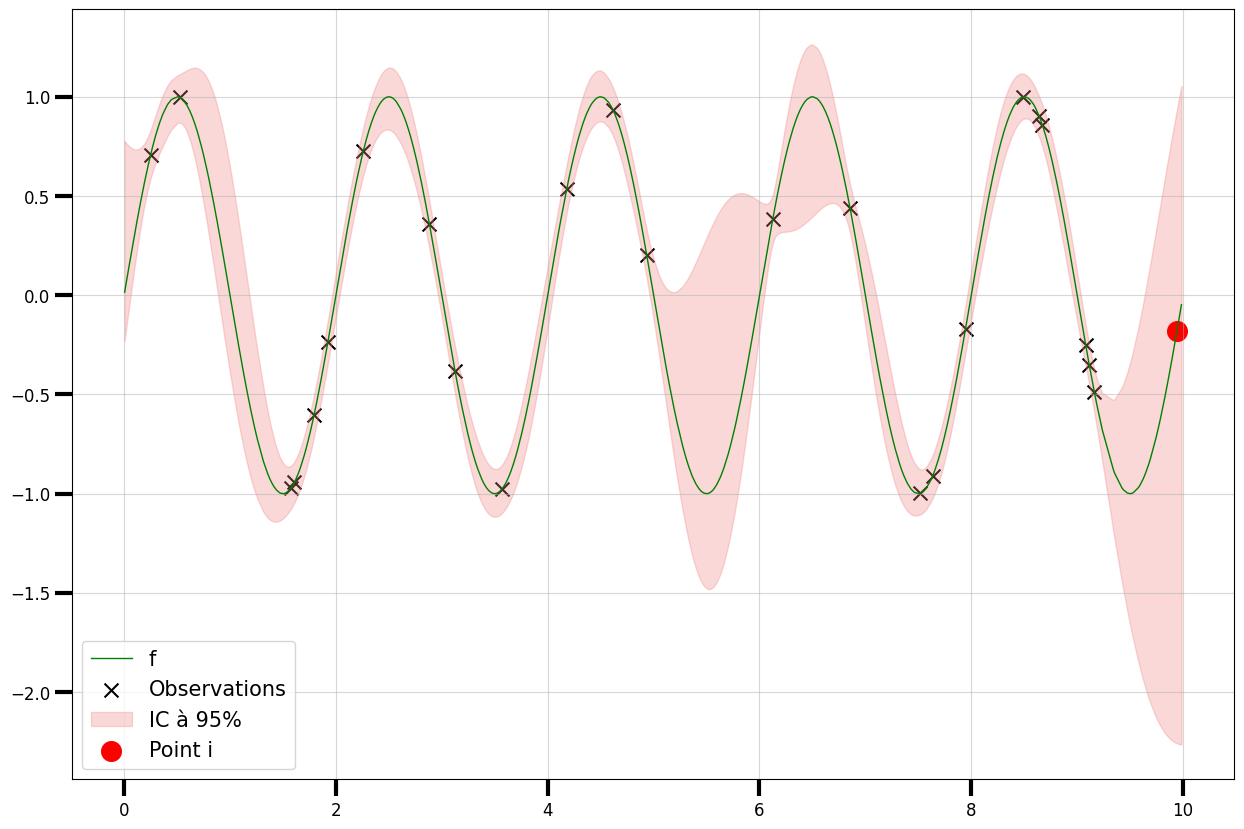

In [10]:
gaussian_process_evaluation = GaussianProcessEvaluation(library, X_function, Y_function, X_observed, Y_observed, kernel_name, kernel_parameters_optimization, gaussian_process_parameters, show_plots=True)
mahalanobis_distances       = gaussian_process_evaluation.compute_mahalanobis_distances()

In [11]:
mahalanobis_distances

[0.7189940049984542,
 1.1669835320920434,
 0.14931227101855757,
 0.04111610637078059,
 0.09590339059556446,
 0.013669947857927543,
 0.09801846610248681,
 0.3649925853971118,
 0.3306120043136733,
 0.09384915619147026,
 0.2870532342831239,
 1.021213675111039,
 1.097298223082796,
 0.018297130174625274,
 1.015336726013442,
 0.3542949589455296,
 0.09954798995032224,
 0.1448510554918999,
 0.16392551984858447,
 0.06986380246162449,
 0.13222015080585311,
 0.21907750268127751,
 0.01795992590272099,
 0.41139221734778436,
 0.5904207125490915]